In [10]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import optimizers
from tensorflow.keras import losses
from tensorflow.keras import metrics

from sklearn.model_selection import train_test_split

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [11]:
# create point clusters

num_clusters = 5
num_points = 1000

clusters = np.random.randn(num_clusters, 2) * 10
X = np.random.randn(num_points, 2)
y = np.zeros((num_points, 1))

for i in range(num_points):
    j = i % num_clusters
    y[i] = j
    X[i,:] += clusters[j, :]

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [13]:
model = keras.Sequential([
    keras.Input(shape=(2,)),
    layers.Dense(num_points, activation="relu"),
    layers.Dense(num_points, activation="softmax")
])

In [14]:
optimizer = optimizers.Adam(learning_rate=0.01)
loss = losses.SparseCategoricalCrossentropy()
metric = keras.metrics.SparseCategoricalAccuracy()
model.compile(optimizer=optimizer, loss=loss, metrics=[metric])

In [15]:
model.fit(X, y, epochs=10)

Epoch 1/10
32/32 [==============================] - 1s 11ms/step - loss: 1.6440 - sparse_categorical_accuracy: 0.6308
Epoch 2/10
32/32 [==============================] - 0s 12ms/step - loss: 0.1218 - sparse_categorical_accuracy: 0.9511
Epoch 3/10
32/32 [==============================] - 0s 13ms/step - loss: 0.0222 - sparse_categorical_accuracy: 0.9962
Epoch 4/10
32/32 [==============================] - 0s 11ms/step - loss: 0.0182 - sparse_categorical_accuracy: 0.9941
Epoch 5/10
32/32 [==============================] - 0s 11ms/step - loss: 0.0086 - sparse_categorical_accuracy: 0.9979
Epoch 6/10
32/32 [==============================] - 0s 11ms/step - loss: 0.0028 - sparse_categorical_accuracy: 1.0000
Epoch 7/10
32/32 [==============================] - 0s 11ms/step - loss: 0.0028 - sparse_categorical_accuracy: 1.0000
Epoch 8/10
32/32 [==============================] - 0s 11ms/step - loss: 0.0022 - sparse_categorical_accuracy: 1.0000
Epoch 9/10
32/32 [==============================] - 0s 1

In [16]:
# check accuracy on test set to look for overfitting
model.evaluate(X_test, y_test)

10/10 [==============================] - 0s 4ms/step - loss: 7.1509e-04 - sparse_categorical_accuracy: 1.0000


[0.0007150935707613826, 1.0]

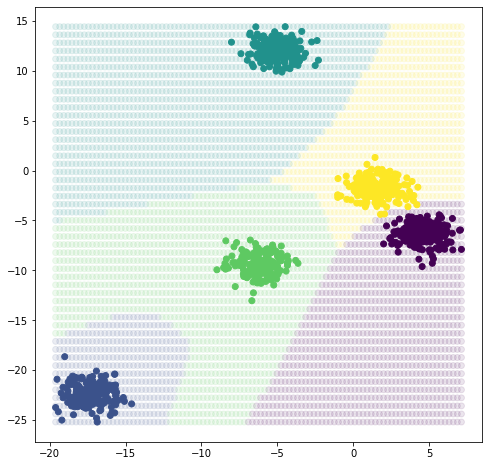

In [23]:
plt.figure(figsize=(8, 8))

# visualize model decision boundaries
min_X = np.min(X, axis=0)
max_X = np.max(X, axis=0)
X_pred = np.array([[X0, X1] for X0 in np.linspace(min_X[0], max_X[0], 100) for X1 in np.linspace(min_X[1], max_X[1])])
y_pred = np.argmax(model.predict(X_pred), axis=1)
plt.scatter(X_pred[:,0], X_pred[:,1], c=y_pred, cmap="viridis", alpha=0.1)

# visualize point clusters
plt.scatter(X[:,0], X[:,1], c=y, cmap="viridis")